<a href="https://colab.research.google.com/github/keiiigo/RecursosOpenSource/blob/antcolonyoptimization/Ant_Colony_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import clear_output
from IPython.display import Markdown, display

In [ ]:
depot_location = (-25.3775625, -57.4761875)
file_path = 'clientescor.csv'

def load_coordinates(file_path, depot_location):
    data = pd.read_csv(file_path)
    coordinates = data[['Latitude', 'Longitude']].values
    customer_ids = data['CustomerID'].astype(str).values
    coords_with_depot = np.vstack([depot_location, coordinates])
    customer_ids_with_depot = np.insert(customer_ids, 0, 'Depot')
    return coords_with_depot, customer_ids_with_depot

In [ ]:
# Calcular la distancia entre los puntos
def distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# Matriz de distancia
def create_distance_matrix(coords):
    num_points = len(coords)
    dist_matrix = np.zeros((num_points, num_points))
    for i in range(num_points):
        for j in range(num_points):
            if i != j:
                dist_matrix[i][j] = distance(coords[i], coords[j])
    return dist_matrix

In [ ]:
class AntColonyOptimization:
    def __init__(self, dist_matrix, n_ants, n_iterations, alpha=1, beta=2, evaporation_rate=0.5, initial_pheromone=1.0):
        self.dist_matrix = dist_matrix
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate
        self.pheromone_matrix = np.full(dist_matrix.shape, initial_pheromone)
        self.best_path = None
        self.best_length = float('inf')

    def run(self, update_func):
        num_points = len(self.dist_matrix)

        for iteration in range(self.n_iterations):
            all_paths = []
            all_lengths = []

            for ant in range(self.n_ants):
                path = [0]  #Deposito
                while len(path) < num_points:
                    current_node = path[-1]
                    next_node = self.choose_next_node(current_node, path)
                    path.append(next_node)

                path_length = self.calculate_path_length(path)
                all_paths.append(path)
                all_lengths.append(path_length)

                if path_length < self.best_length:
                    self.best_length = path_length
                    self.best_path = path

            self.update_pheromone_matrix(all_paths, all_lengths)

            update_func(iteration, self.best_path, self.best_length)

        return self.best_path, self.best_length

    def choose_next_node(self, current_node, visited):
        probabilities = []
        for next_node in range(len(self.dist_matrix)):
            if next_node not in visited:
                dist = self.dist_matrix[current_node][next_node]
                if dist == 0:
                    pheromone = 0  #Prevenimos que el 0 cause problemas
                else:
                    pheromone = self.pheromone_matrix[current_node][next_node] ** self.alpha
                heuristic = (1 / dist) ** self.beta if dist != 0 else 0  # Evadimos la division del 0

                # Calculamos la probabilidad
                probabilities.append(pheromone * heuristic)
            else:
                probabilities.append(0)

        probabilities = np.array(probabilities)
        if probabilities.sum() == 0:
            return random.choice([i for i in range(len(self.dist_matrix)) if i not in visited])

        # Normalize probabilities to sum to 1
        probabilities /= probabilities.sum()
        return np.random.choice(range(len(self.dist_matrix)), p=probabilities)

    def calculate_path_length(self, path):
        length = 0
        for i in range(len(path) - 1):
            length += self.dist_matrix[path[i]][path[i + 1]]
        length += self.dist_matrix[path[-1]][path[0]]  #Fin del recorrido
        return length

    def update_pheromone_matrix(self, all_paths, all_lengths):
        self.pheromone_matrix *= (1 - self.evaporation_rate)
        for path, path_length in zip(all_paths, all_lengths):
            for i in range(len(path) - 1):
                self.pheromone_matrix[path[i]][path[i + 1]] += 1 / path_length
            self.pheromone_matrix[path[-1]][path[0]] += 1 / path_length

def plot_ants(iteration, best_path, best_length, coords, customer_ids):
    plt.clf()

    best_coords = np.array([coords[i] for i in best_path])

    plt.scatter(coords[:, 0], coords[:, 1], c='blue', marker='o', label='Customers')

    for i, customer_id in enumerate(customer_ids):
        plt.text(coords[i, 0], coords[i, 1], customer_id, fontsize=9, ha='right')

    for i in range(len(best_coords) - 1):
        plt.plot([best_coords[i, 0], best_coords[i + 1, 0]],
                 [best_coords[i, 1], best_coords[i + 1, 1]],
                 'r-', lw=2)

    plt.plot([best_coords[-1, 0], best_coords[0, 0]],
             [best_coords[-1, 1], best_coords[0, 1]],
             'r-', lw=2)

    plt.title(f"Iteration {iteration + 1} | Best Path Length: {best_length:.2f}")

    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.legend()
    plt.grid(True)
    plt.draw()
    clear_output(wait=True)
    plt.pause(0.1)

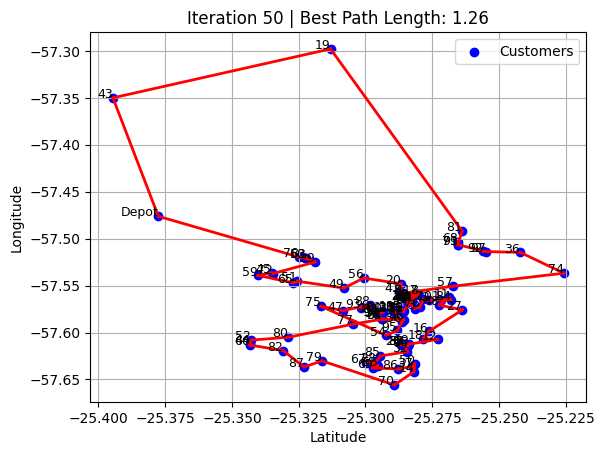

### Results

**Optimal Route:** Depot -> 78 -> 53 -> 60 -> 29 -> 72 -> 45 -> 59 -> 65 -> 51 -> 49 -> 56 -> 20 -> 41 -> 5 -> 21 -> 13 -> 30 -> 63 -> 9 -> 62 -> 6 -> 40 -> 1 -> 42 -> 33 -> 3 -> 76 -> 7 -> 2 -> 101 -> 84 -> 11 -> 48 -> 27 -> 16 -> 18 -> 12 -> 99 -> 96 -> 89 -> 26 -> 38 -> 32 -> 85 -> 28 -> 67 -> 55 -> 69 -> 86 -> 37 -> 50 -> 14 -> 70 -> 79 -> 87 -> 82 -> 66 -> 44 -> 52 -> 80 -> 77 -> 64 -> 46 -> 31 -> 34 -> 39 -> 94 -> 83 -> 100 -> 61 -> 93 -> 88 -> 47 -> 75 -> 54 -> 95 -> 58 -> 35 -> 24 -> 23 -> 10 -> 15 -> 98 -> 22 -> 71 -> 25 -> 8 -> 90 -> 17 -> 4 -> 57 -> 74 -> 36 -> 92 -> 97 -> 73 -> 68 -> 91 -> 81 -> 19 -> 43

**Total Distance:** 1.26 units

In [ ]:
# Ejecucion principal
coords, customer_ids = load_coordinates(file_path, depot_location)
dist_matrix = create_distance_matrix(coords)

aco = AntColonyOptimization(dist_matrix, n_ants=50, n_iterations=50) #Numero de hormigas y numero de iteraciones que vamos a utilizar
fig, ax = plt.subplots(figsize=(10, 8))

def update_func(iteration, best_path, best_length):
    plot_ants(iteration, best_path, best_length, coords, customer_ids)

best_path, best_length = aco.run(update_func)

route_order = [customer_ids[i] for i in best_path]  # Utilizamos los ID de los clientes
formatted_route = " -> ".join(route_order)

display(Markdown(f"### Results"))
display(Markdown(f"**Optimal Route:** {formatted_route}"))
display(Markdown(f"**Total Distance:** {best_length:.2f} units"))
